In [2]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Data
X_lead0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INCART12/Delaney come in/After Smoothing/X_lead0_dws_smoother.csv',header=None)
Y_lead0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INCART12/Delaney come in/Before Smoothing/Y_lead0_dws.csv', header=None)

# Visualize Data

In [5]:
X_lead0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,...,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0
1,0.0,0.787314,0.677550,0.578413,0.489903,0.412020,0.279972,0.259627,0.255209,0.247719,0.249559,0.257716,0.260066,0.261389,0.262889,0.254090,0.254933,0.260795,0.270184,0.276876,0.272212,0.277057,0.279553,0.281355,0.293125,0.311037,0.328832,0.358271,0.380952,0.399310,0.415957,0.422128,0.410181,0.386679,0.353520,0.334773,0.313758,0.297707,0.291671,0.287257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.761128,0.632939,0.520734,0.424513,0.344277,0.229422,0.219609,0.212608,0.209929,0.211617,0.229030,0.230013,0.223274,0.221947,0.228400,0.227368,0.241762,0.252127,0.260713,0.256496,0.260501,0.268921,0.274946,0.278726,0.298865,0.306535,0.327979,0.341816,0.367880,0.392085,0.401796,0.391756,0.379282,0.350715,0.333578,0.307829,0.297671,0.292373,0.286506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.799528,0.695477,0.600386,0.514255,0.437085,0.307022,0.284914,0.272801,0.260781,0.258647,0.266239,0.267393,0.271131,0.264912,0.265346,0.259566,0.258010,0.258396,0.262195,0.264557,0.274314,0.282152,0.300060,0.310214,0.331007,0.349927,0.365183,0.379252,0.391037,0.397712,0.396558,0.377702,0.363223,0.339271,0.313258,0.298658,0.287477,0.280675,0.277531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.719274,0.586468,0.476492,0.389346,0.325030,0.286343,0.289331,0.286435,0.288297,0.288127,0.293827,0.290203,0.293569,0.293056,0.296020,0.303916,0.315880,0.320260,0.330976,0.337287,0.347492,0.354864,0.363723,0.381296,0.397384,0.410183,0.432632,0.458443,0.472281,0.475887,0.469291,0.453093,0.433891,0.400204,0.379290,0.372798,0.366084,0.365246,0.351831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our preprocessed file was saved with a header and an index column which we don't want here. We drop them.

In [6]:
X_lead0 = X_lead0.drop(0,axis=0)
X_lead0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
1,0.0,0.787314,0.677550,0.578413,0.489903,0.412020,0.279972,0.259627,0.255209,0.247719,0.249559,0.257716,0.260066,0.261389,0.262889,0.254090,0.254933,0.260795,0.270184,0.276876,0.272212,0.277057,0.279553,0.281355,0.293125,0.311037,0.328832,0.358271,0.380952,0.399310,0.415957,0.422128,0.410181,0.386679,0.353520,0.334773,0.313758,0.297707,0.291671,0.287257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.761128,0.632939,0.520734,0.424513,0.344277,0.229422,0.219609,0.212608,0.209929,0.211617,0.229030,0.230013,0.223274,0.221947,0.228400,0.227368,0.241762,0.252127,0.260713,0.256496,0.260501,0.268921,0.274946,0.278726,0.298865,0.306535,0.327979,0.341816,0.367880,0.392085,0.401796,0.391756,0.379282,0.350715,0.333578,0.307829,0.297671,0.292373,0.286506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.799528,0.695477,0.600386,0.514255,0.437085,0.307022,0.284914,0.272801,0.260781,0.258647,0.266239,0.267393,0.271131,0.264912,0.265346,0.259566,0.258010,0.258396,0.262195,0.264557,0.274314,0.282152,0.300060,0.310214,0.331007,0.349927,0.365183,0.379252,0.391037,0.397712,0.396558,0.377702,0.363223,0.339271,0.313258,0.298658,0.287477,0.280675,0.277531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.719274,0.586468,0.476492,0.389346,0.325030,0.286343,0.289331,0.286435,0.288297,0.288127,0.293827,0.290203,0.293569,0.293056,0.296020,0.303916,0.315880,0.320260,0.330976,0.337287,0.347492,0.354864,0.363723,0.381296,0.397384,0.410183,0.432632,0.458443,0.472281,0.475887,0.469291,0.453093,0.433891,0.400204,0.379290,0.372798,0.366084,0.365246,0.351831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.389985,0.340168,0.304641,0.283404,0.276456,0.303766,0.336789,0.349175,0.368894,0.380603,0.394203,0.395246,0.395842,0.392322,0.387452,0.387032,0.394564,0.402097,0.418245,0.438168,0.467370,0.503200,0.530425,0.564332,0.583263,0.590397,0.587387,0.569755,0.548481,0.515262,0.477722,0.452459,0.419934,0.393464,0.367979,0.343526,0.332216,0.322360,0.317213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175908,175907.0,0.924656,0.831000,0.752741,0.689879,0.642414,0.597915,0.597873,0.597898,0.603335,0.603790,0.607828,0.607096,0.608844,0.609015,0.610536,0.610021,0.610620,0.610038,0.609986,0.608906,0.608593,0.607127,0.607211,0.605879,0.605281,0.604334,0.603932,0.602573,0.601095,0.598390,0.596470,0.592524,0.588899,0.584165,0.580070,0.576333,0.573681,0.572211,0.572723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175909,175908.0,0.938758,0.839338,0.757086,0.692004,0.644092,0.602030,0.607579,0.611205,0.616012,0.615485,0.618193,0.615506,0.616857,0.616397,0.618505,0.617904,0.618541,0.617512,0.616902,0.615120,0.614634,0.612786,0.612411,0.610426,0.609346,0.607596,0.605850,0.

In [7]:
X_lead0 = X_lead0.drop(columns=[0])
X_lead0

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
1,0.787314,0.677550,0.578413,0.489903,0.412020,0.279972,0.259627,0.255209,0.247719,0.249559,0.257716,0.260066,0.261389,0.262889,0.254090,0.254933,0.260795,0.270184,0.276876,0.272212,0.277057,0.279553,0.281355,0.293125,0.311037,0.328832,0.358271,0.380952,0.399310,0.415957,0.422128,0.410181,0.386679,0.353520,0.334773,0.313758,0.297707,0.291671,0.287257,0.282438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.761128,0.632939,0.520734,0.424513,0.344277,0.229422,0.219609,0.212608,0.209929,0.211617,0.229030,0.230013,0.223274,0.221947,0.228400,0.227368,0.241762,0.252127,0.260713,0.256496,0.260501,0.268921,0.274946,0.278726,0.298865,0.306535,0.327979,0.341816,0.367880,0.392085,0.401796,0.391756,0.379282,0.350715,0.333578,0.307829,0.297671,0.292373,0.286506,0.284346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.799528,0.695477,0.600386,0.514255,0.437085,0.307022,0.284914,0.272801,0.260781,0.258647,0.266239,0.267393,0.271131,0.264912,0.265346,0.259566,0.258010,0.258396,0.262195,0.264557,0.274314,0.282152,0.300060,0.310214,0.331007,0.349927,0.365183,0.379252,0.391037,0.397712,0.396558,0.377702,0.363223,0.339271,0.313258,0.298658,0.287477,0.280675,0.277531,0.270829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.719274,0.586468,0.476492,0.389346,0.325030,0.286343,0.289331,0.286435,0.288297,0.288127,0.293827,0.290203,0.293569,0.293056,0.296020,0.303916,0.315880,0.320260,0.330976,0.337287,0.347492,0.354864,0.363723,0.381296,0.397384,0.410183,0.432632,0.458443,0.472281,0.475887,0.469291,0.453093,0.433891,0.400204,0.379290,0.372798,0.366084,0.365246,0.351831,0.346657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.389985,0.340168,0.304641,0.283404,0.276456,0.303766,0.336789,0.349175,0.368894,0.380603,0.394203,0.395246,0.395842,0.392322,0.387452,0.387032,0.394564,0.402097,0.418245,0.438168,0.467370,0.503200,0.530425,0.564332,0.583263,0.590397,0.587387,0.569755,0.548481,0.515262,0.477722,0.452459,0.419934,0.393464,0.367979,0.343526,0.332216,0.322360,0.317213,0.326714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175908,0.924656,0.831000,0.752741,0.689879,0.642414,0.597915,0.597873,0.597898,0.603335,0.603790,0.607828,0.607096,0.608844,0.609015,0.610536,0.610021,0.610620,0.610038,0.609986,0.608906,0.608593,0.607127,0.607211,0.605879,0.605281,0.604334,0.603932,0.602573,0.601095,0.598390,0.596470,0.592524,0.588899,0.584165,0.580070,0.576333,0.573681,0.572211,0.572723,0.574947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175909,0.938758,0.839338,0.757086,0.692004,0.644092,0.602030,0.607579,0.611205,0.616012,0.615485,0.618193,0.615506,0.616857,0.616397,0.618505,0.617904,0.618541,0.617512,0.616902,0.615120,0.614634,0.612786,0.612411,0.610426,0.609346,0.6

Same cleaning we did for X_lead0, we do it for Y_lead0

In [8]:
Y_lead0 = Y_lead0.drop(0,axis=0)
Y_lead0 = Y_lead0.drop(columns=[0])

In [9]:
Y_lead0

,1
1,N
2,N
3,N
4,N
5,V
...,...
175908,N
175909,N
175910,N
175911,N


Make a table of the data and their labels (glue Xlead0 and Y_lead0)

In [10]:
lead0_data = X_lead0
lead0_data['Label'] = Y_lead0
lead0_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,Label
1,0.787314,0.677550,0.578413,0.489903,0.412020,0.279972,0.259627,0.255209,0.247719,0.249559,0.257716,0.260066,0.261389,0.262889,0.254090,0.254933,0.260795,0.270184,0.276876,0.272212,0.277057,0.279553,0.281355,0.293125,0.311037,0.328832,0.358271,0.380952,0.399310,0.415957,0.422128,0.410181,0.386679,0.353520,0.334773,0.313758,0.297707,0.291671,0.287257,0.282438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.761128,0.632939,0.520734,0.424513,0.344277,0.229422,0.219609,0.212608,0.209929,0.211617,0.229030,0.230013,0.223274,0.221947,0.228400,0.227368,0.241762,0.252127,0.260713,0.256496,0.260501,0.268921,0.274946,0.278726,0.298865,0.306535,0.327979,0.341816,0.367880,0.392085,0.401796,0.391756,0.379282,0.350715,0.333578,0.307829,0.297671,0.292373,0.286506,0.284346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.799528,0.695477,0.600386,0.514255,0.437085,0.307022,0.284914,0.272801,0.260781,0.258647,0.266239,0.267393,0.271131,0.264912,0.265346,0.259566,0.258010,0.258396,0.262195,0.264557,0.274314,0.282152,0.300060,0.310214,0.331007,0.349927,0.365183,0.379252,0.391037,0.397712,0.396558,0.377702,0.363223,0.339271,0.313258,0.298658,0.287477,0.280675,0.277531,0.270829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.719274,0.586468,0.476492,0.389346,0.325030,0.286343,0.289331,0.286435,0.288297,0.288127,0.293827,0.290203,0.293569,0.293056,0.296020,0.303916,0.315880,0.320260,0.330976,0.337287,0.347492,0.354864,0.363723,0.381296,0.397384,0.410183,0.432632,0.458443,0.472281,0.475887,0.469291,0.453093,0.433891,0.400204,0.379290,0.372798,0.366084,0.365246,0.351831,0.346657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
5,0.389985,0.340168,0.304641,0.283404,0.276456,0.303766,0.336789,0.349175,0.368894,0.380603,0.394203,0.395246,0.395842,0.392322,0.387452,0.387032,0.394564,0.402097,0.418245,0.438168,0.467370,0.503200,0.530425,0.564332,0.583263,0.590397,0.587387,0.569755,0.548481,0.515262,0.477722,0.452459,0.419934,0.393464,0.367979,0.343526,0.332216,0.322360,0.317213,0.326714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175908,0.924656,0.831000,0.752741,0.689879,0.642414,0.597915,0.597873,0.597898,0.603335,0.603790,0.607828,0.607096,0.608844,0.609015,0.610536,0.610021,0.610620,0.610038,0.609986,0.608906,0.608593,0.607127,0.607211,0.605879,0.605281,0.604334,0.603932,0.602573,0.601095,0.598390,0.596470,0.592524,0.588899,0.584165,0.580070,0.576333,0.573681,0.572211,0.572723,0.574947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
175909,0.938758,0.839338,0.757086,0.692004,0.644092,0.602030,0.607579,0.611205,0.616012,0.615485,0.618193,0.615506,0.616857,0.616397,0.618505,0.617904,0.618541,0.617512,0.616902,0.615120,0.614634,0.612786,0.612411,0.610426,0.609346,0.607596,0.60

In [11]:
np.unique(Y_lead0.values)

array(['+', 'A', 'B', 'F', 'N', 'Q', 'R', 'S', 'V', 'j', 'n'],
      dtype=object)

According to the paper, we should group those annotations as follows (AAMI standard classes)

Class Distribution
* N, L, R, e, j will be grouped as N
* A, a, J, S will be grouped as S
* V, E as V
* F
* f, Q as Q

In [12]:
lead0_data = lead0_data.replace('R','N')

In [13]:
lead0_data = lead0_data.replace('A','S')

In [14]:
lead0_data = lead0_data.replace('j','N')

In [15]:
lead0_data = lead0_data.replace('n','N')

In [16]:
lead0_data = lead0_data.replace('B','N')

In [17]:
np.unique((lead0_data["Label"]).values)

array(['+', 'F', 'N', 'Q', 'S', 'V'], dtype=object)

In [18]:
lead0_N = lead0_data[lead0_data['Label'] == 'N']
lead0_S = lead0_data[lead0_data['Label'] == 'S']
lead0_V = lead0_data[lead0_data['Label'] == 'V']
lead0_F = lead0_data[lead0_data['Label'] == 'F']
lead0_Q = lead0_data[lead0_data['Label'] == 'Q']

In [19]:
# Number of points in each class
n_lead0_N = len(lead0_N)
n_lead0_S = len(lead0_S)
n_lead0_V = len(lead0_V)
n_lead0_F = len(lead0_F)
n_lead0_Q = len(lead0_Q)
class_totals = [n_lead0_N,n_lead0_S,n_lead0_V,n_lead0_F,n_lead0_Q]
class_totals

[153704, 1960, 20011, 219, 6]

In [20]:
lead0_5 = lead0_N.append([lead0_S,lead0_V,lead0_F,lead0_Q])
lead0_5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,Label
1,0.787314,0.677550,0.578413,0.489903,0.412020,0.279972,0.259627,0.255209,0.247719,0.249559,0.257716,0.260066,0.261389,0.262889,0.254090,0.254933,0.260795,0.270184,0.276876,0.272212,0.277057,0.279553,0.281355,0.293125,0.311037,0.328832,0.358271,0.380952,0.399310,0.415957,0.422128,0.410181,0.386679,0.353520,0.334773,0.313758,0.297707,0.291671,0.287257,0.282438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.761128,0.632939,0.520734,0.424513,0.344277,0.229422,0.219609,0.212608,0.209929,0.211617,0.229030,0.230013,0.223274,0.221947,0.228400,0.227368,0.241762,0.252127,0.260713,0.256496,0.260501,0.268921,0.274946,0.278726,0.298865,0.306535,0.327979,0.341816,0.367880,0.392085,0.401796,0.391756,0.379282,0.350715,0.333578,0.307829,0.297671,0.292373,0.286506,0.284346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.799528,0.695477,0.600386,0.514255,0.437085,0.307022,0.284914,0.272801,0.260781,0.258647,0.266239,0.267393,0.271131,0.264912,0.265346,0.259566,0.258010,0.258396,0.262195,0.264557,0.274314,0.282152,0.300060,0.310214,0.331007,0.349927,0.365183,0.379252,0.391037,0.397712,0.396558,0.377702,0.363223,0.339271,0.313258,0.298658,0.287477,0.280675,0.277531,0.270829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.719274,0.586468,0.476492,0.389346,0.325030,0.286343,0.289331,0.286435,0.288297,0.288127,0.293827,0.290203,0.293569,0.293056,0.296020,0.303916,0.315880,0.320260,0.330976,0.337287,0.347492,0.354864,0.363723,0.381296,0.397384,0.410183,0.432632,0.458443,0.472281,0.475887,0.469291,0.453093,0.433891,0.400204,0.379290,0.372798,0.366084,0.365246,0.351831,0.346657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
6,0.892897,0.735334,0.602562,0.494580,0.411387,0.325889,0.329208,0.321787,0.320718,0.322448,0.320577,0.321365,0.322472,0.322885,0.327679,0.330927,0.333499,0.337171,0.341365,0.345367,0.350215,0.355622,0.363272,0.375569,0.391361,0.406054,0.422959,0.429029,0.442839,0.450432,0.455309,0.450203,0.445851,0.427046,0.408074,0.378391,0.360935,0.338856,0.327004,0.321925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66251,0.574932,0.547516,0.536308,0.541307,0.562515,0.618144,0.667276,0.697016,0.704725,0.676744,0.623511,0.563696,0.519478,0.519055,0.519353,0.517230,0.520127,0.518261,0.523907,0.531091,0.538300,0.546341,0.554873,0.552541,0.549896,0.546134,0.540034,0.512264,0.502025,0.501031,0.517359,0.542237,0.552237,0.562843,0.572004,0.561182,0.572374,0.579067,0.582461,0.595067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Q
71775,0.169299,0.339279,0.474646,0.575402,0.641547,0.655594,0.631030,0.619033,0.602348,0.590505,0.577751,0.575831,0.580042,0.591670,0.609597,0.633226,0.602071,0.501839,0.430957,0.453990,0.546617,0.670979,0.794597,0.870342,0.845711,0.727062,0.6279

In what follows, we plot the first 50 heartbeats from N,S,V,F, Q. Note that Q plot is very light because they are very few.

In [21]:
N_plot = lead0_N.drop(columns = ['Label']).values
S_plot = lead0_S.drop(columns = ['Label']).values
V_plot = lead0_V.drop(columns = ['Label']).values
F_plot = lead0_F.drop(columns = ['Label']).values
Q_plot = lead0_Q.drop(columns = ['Label']).values

In [22]:
# Calculate average of first 50 heartbeats in each class
trainN_avg = np.mean(N_plot[:50],axis=0)
trainS_avg = np.mean(S_plot[:50],axis=0)
trainV_avg = np.mean(V_plot[:50],axis=0)
trainF_avg = np.mean(F_plot[:50],axis=0)
trainQ_avg = np.mean(Q_plot[:50],axis=0)

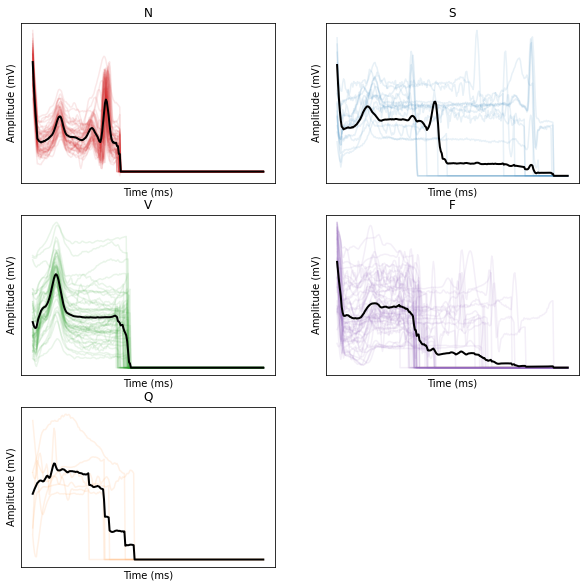

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
for i in range(50):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(N_plot[i],'tab:red',alpha=0.1)
plt.plot(trainN_avg,'k',linewidth=2)
plt.title('N')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.subplot(3,2,2)
for i in range(15):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(S_plot[i],'tab:blue',alpha=0.1)
plt.plot(trainS_avg,'k',linewidth=2)
plt.title('S')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.subplot(3,2,3)
for i in range(50):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(V_plot[i],'tab:green',alpha=0.1)
plt.plot(trainV_avg,'k',linewidth=2)
plt.title('V')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.subplot(3,2,4)
for i in range(50):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(F_plot[i],'tab:purple',alpha=0.1)
plt.plot(trainF_avg,'k',linewidth=2)
plt.title('F')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.subplot(3,2,5)
for i in range(6):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(Q_plot[i],'tab:orange',alpha=0.1)
plt.plot(trainQ_avg,'k',linewidth=2)
plt.title('Q')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()

They definitely look as they should

Get Data ready for training

In [ ]:
# Create test labels [N:0,S:1,V:2,F:3,Q:4]
labels = lead0_5["Label"]
labels[labels=='N'] = 0
labels[labels=='S'] = 1
labels[labels=='V'] = 2
labels[labels=='F'] = 3
labels[labels=='Q'] = 4

In [26]:
labels

1         0
2         0
3         0
4         0
6         0
         ..
66251     4
71775     4
90978     4
134484    4
134525    4
Name: Label, Length: 175900, dtype: object

In [27]:
lead0_5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,Label
1,0.787314,0.677550,0.578413,0.489903,0.412020,0.279972,0.259627,0.255209,0.247719,0.249559,0.257716,0.260066,0.261389,0.262889,0.254090,0.254933,0.260795,0.270184,0.276876,0.272212,0.277057,0.279553,0.281355,0.293125,0.311037,0.328832,0.358271,0.380952,0.399310,0.415957,0.422128,0.410181,0.386679,0.353520,0.334773,0.313758,0.297707,0.291671,0.287257,0.282438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.761128,0.632939,0.520734,0.424513,0.344277,0.229422,0.219609,0.212608,0.209929,0.211617,0.229030,0.230013,0.223274,0.221947,0.228400,0.227368,0.241762,0.252127,0.260713,0.256496,0.260501,0.268921,0.274946,0.278726,0.298865,0.306535,0.327979,0.341816,0.367880,0.392085,0.401796,0.391756,0.379282,0.350715,0.333578,0.307829,0.297671,0.292373,0.286506,0.284346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.799528,0.695477,0.600386,0.514255,0.437085,0.307022,0.284914,0.272801,0.260781,0.258647,0.266239,0.267393,0.271131,0.264912,0.265346,0.259566,0.258010,0.258396,0.262195,0.264557,0.274314,0.282152,0.300060,0.310214,0.331007,0.349927,0.365183,0.379252,0.391037,0.397712,0.396558,0.377702,0.363223,0.339271,0.313258,0.298658,0.287477,0.280675,0.277531,0.270829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.719274,0.586468,0.476492,0.389346,0.325030,0.286343,0.289331,0.286435,0.288297,0.288127,0.293827,0.290203,0.293569,0.293056,0.296020,0.303916,0.315880,0.320260,0.330976,0.337287,0.347492,0.354864,0.363723,0.381296,0.397384,0.410183,0.432632,0.458443,0.472281,0.475887,0.469291,0.453093,0.433891,0.400204,0.379290,0.372798,0.366084,0.365246,0.351831,0.346657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.892897,0.735334,0.602562,0.494580,0.411387,0.325889,0.329208,0.321787,0.320718,0.322448,0.320577,0.321365,0.322472,0.322885,0.327679,0.330927,0.333499,0.337171,0.341365,0.345367,0.350215,0.355622,0.363272,0.375569,0.391361,0.406054,0.422959,0.429029,0.442839,0.450432,0.455309,0.450203,0.445851,0.427046,0.408074,0.378391,0.360935,0.338856,0.327004,0.321925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66251,0.574932,0.547516,0.536308,0.541307,0.562515,0.618144,0.667276,0.697016,0.704725,0.676744,0.623511,0.563696,0.519478,0.519055,0.519353,0.517230,0.520127,0.518261,0.523907,0.531091,0.538300,0.546341,0.554873,0.552541,0.549896,0.546134,0.540034,0.512264,0.502025,0.501031,0.517359,0.542237,0.552237,0.562843,0.572004,0.561182,0.572374,0.579067,0.582461,0.595067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
71775,0.169299,0.339279,0.474646,0.575402,0.641547,0.655594,0.631030,0.619033,0.602348,0.590505,0.577751,0.575831,0.580042,0.591670,0.609597,0.633226,0.602071,0.501839,0.430957,0.453990,0.546617,0.670979,0.794597,0.870342,0.845711,0.727062,0.6279

Create train, test split. Note that this data were segmented each patient after the other, and so for training and splitting they must be shuffled

In [28]:
def pre_process(data):
    X_train = np.asarray(data.drop(columns=['Label']))
    y_train = np.asarray(data['Label'])
    indexes = np.arange(int(X_train.shape[0]))
    indexes = np.random.RandomState(seed=42).permutation(indexes)  # shuffle data to randomly select
    X_train_shuffled = X_train[indexes]
    y_train_shuffled = y_train[indexes]
    y_train_shuffled = y_train_shuffled.astype(int)
   # y_train_shuffled_cat = to_categorical(y_train_shuffled)
    return X_train_shuffled,y_train_shuffled#,y_train_shuffled_cat

In [29]:
X_shuffled, y_shuffled = pre_process(lead0_5)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_shuffled,
                                                    y_shuffled,
                                                    test_size=0.5,
                                                    random_state=42)

In [32]:
X_train.shape

(87950, 250)

In [33]:
X_train_new = X_train.reshape(len(X_train),250,1)
y_train_new = to_categorical(y_train)
X_test_new = X_train.reshape(len(X_test),250,1)
y_test_new = to_categorical(y_test)

# Build Model

In [34]:
from keras import layers
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling1D
from keras.models import Sequential,save_model,load_model
from keras import optimizers
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

In [35]:
def build_model():
    model = Sequential()
    
    # Convolutional block 1
    model.add(Conv1D(256,2,strides=1,activation = 'relu',input_shape=(250,1)))
    model.add(Conv1D(256,2,strides=1,activation = 'relu'))
    model.add(Conv1D(256,2,strides=1,activation = 'relu'))

    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Convolutional block 2
    model.add(Conv1D(256,2,strides=1,activation = 'relu'))
    model.add(Conv1D(256,2,strides=1,activation = 'relu'))
    model.add(Conv1D(256,2,strides=1,activation = 'relu'))

    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(GlobalAveragePooling1D())
              
    model.add(Dense(128,activation = 'relu'))
    
    model.add(Dense(5, activation='softmax'))          
    
    return model

In [36]:
# Fine tunes the learning after the 80th epoch
def lr_decay(epoch):
    if epoch < 80:
        learn_rate = 0.001
    else: 
        learn_rate = 0.0001
    return learn_rate

In [37]:
""" Define focal loss function as per 
    https://www.dlology.com/blog/
    multi-class-classification-with-focal-loss-for-imbalanced-datasets/""" 
def focal_loss_fnc(gamma,alpha):
    
    gamma = float(gamma)
    alpha = float(alpha)
    
    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [38]:
def train_model(model,X_train,y_train,X_valid,y_valid,filename,n_epochs=100,batch_size=400,
                learn_rate=0.001,focal_loss=True,gamma=2,alpha=0.25):
    
    if focal_loss:
        loss = focal_loss_fnc(gamma,alpha) # still need to define
        
    else:
        loss = 'categorical_crossentropy'
    
    adam = optimizers.Adam(learning_rate=learn_rate)
    
    # may want to change metrics later
    model.compile(optimizer=adam,loss=loss,metrics=['accuracy'])
    
    # Reduce learning rate to 0.0001 after 80th epoch
    callbacks = LearningRateScheduler(lr_decay)
        
    history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid), epochs=n_epochs,batch_size=batch_size,callbacks=callbacks)
    
    print("\nEvaluating...", flush=True)
    print('Training data:', flush=True)
    loss, acc = model.evaluate(X_train, y_train, verbose=1)
    print("  Training : loss %.3f - acc %.3f" % (loss, acc))
    
    print('Saving model...', flush=True)
    save_model(
    model,
    filename,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )
    
    return model, history

# Train model without Focal Loss

For focal loss, just change False to True in the code below

In [ ]:
 filename = "model_lead0_woutfocal_loss_smooth"
 model_woutfocal_loss_smooth,history_woutfocal_loss_smooth = train_model(build_model(),
                                                             X_train_new,
                                                             y_train_new,
                                                             X_test_new,
                                                             y_test_new,
                                                             filename,
                                                             focal_loss = False)
 hist_df_woutfocal_loss_smooth = pd.DataFrame(history_woutfocal_loss_smooth.history)
 hist_df_woutfocal_loss_smooth.to_csv("/content/drive/MyDrive/Colab Notebooks/INCART12/history_woutfocal_loss_smooth.csv", index=False)

Epoch 1/100
220/220 [==============================] - 29s 132ms/step - loss: 0.4183 - accuracy: 0.8681 - val_loss: 1.4421 - val_accuracy: 0.8736
Epoch 2/100
220/220 [==============================] - 29s 130ms/step - loss: 0.3114 - accuracy: 0.8839 - val_loss: 1.4333 - val_accuracy: 0.8736
Epoch 3/100
220/220 [==============================] - 29s 130ms/step - loss: 0.2394 - accuracy: 0.9159 - val_loss: 1.4147 - val_accuracy: 0.8736
Epoch 4/100
220/220 [==============================] - 29s 130ms/step - loss: 0.2129 - accuracy: 0.9268 - val_loss: 0.8964 - val_accuracy: 0.8648
Epoch 5/100
220/220 [==============================] - 29s 130ms/step - loss: 0.1913 - accuracy: 0.9345 - val_loss: 0.9570 - val_accuracy: 0.8427
Epoch 6/100
220/220 [==============================] - 29s 130ms/step - loss: 0.1757 - accuracy: 0.9403 - val_loss: 0.9023 - val_accuracy: 0.8297
Epoch 7/100
220/220 [==============================] - 29s 130ms/step - loss: 0.1628 - accuracy: 0.9447 - val_loss: 1.0251 -